# Merge Sorted Array

You are given two integer arrays `nums1` and `nums2`, sorted in **non-decreasing** order, and two integers `m` and `n`, representing the number of elements in `nums1` and `nums2` respectively.

Merge `nums1` and `nums2` into a single array sorted in **non-decreasing** order.

The final sorted array should not be returned by the function, but instead be stored inside the array `nums1`. To accommodate this, `nums1` has a length of `m` + `n`, where the first m elements denote the elements that should be merged, and the last `n` elements are set to 0 and should be ignored. `nums2` has a length of `n`.

 

**Example 1:**

> Input: nums1 = [1,2,3,0,0,0], m = 3, nums2 = [2,5,6], n = 3  
> Output: [1,2,2,3,5,6]  
> Explanation: The arrays we are merging are [1,2,3] and [2,5,6].  
> The result of the merge is [1,2,2,3,5,6] with the underlined elements coming from `nums1`.  


**Example 2:**

> Input: nums1 = [1], m = 1, nums2 = [], n = 0  
> Output: [1]  
> Explanation: The arrays we are merging are [1] and [].  
> The result of the merge is [1].  


**Example 3:**

> Input: nums1 = [0], m = 0, nums2 = [1], n = 1. 
> Output: [1]. 
> Explanation: The arrays we are merging are [] and [1]. 
> The result of the merge is [1].  
> Note that because m = 0, there are no elements in `nums1`. The 0 is only there to ensure the merge result can fit in `nums1`.  
 

**Constraints**:

* nums1.length == m + n
* nums2.length == n
* 0 <= m, n <= 200
* 1 <= m + n <= 200
* -10^9 <= nums1[i], nums2[j] <= 10^9


In [2]:
from merge_sorted_array import MergeSortedArray

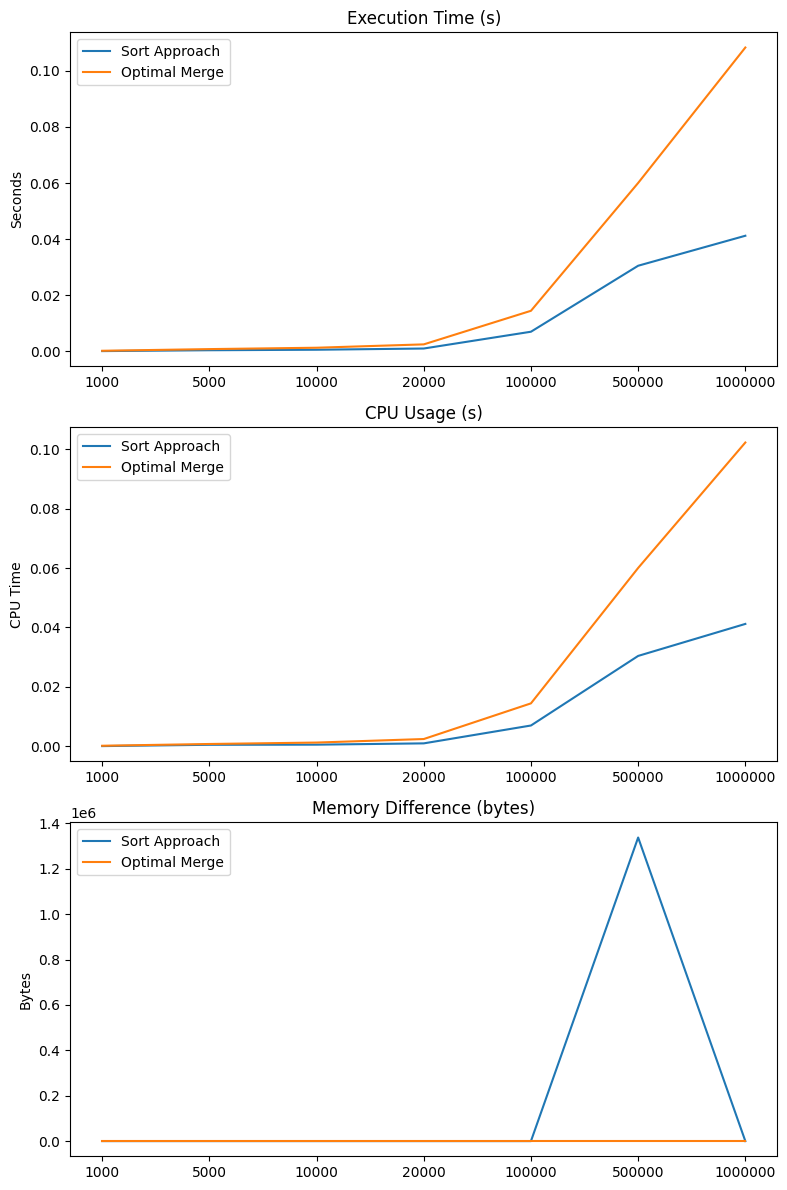

In [4]:
import os
import random
import time

import matplotlib.pyplot as plt
import psutil


# --- Benchmark Helper ---
def benchmark(func, m, n, repeats=3):
    times, memories, cpus = [], [], []
    for _ in range(repeats):
        nums1 = sorted(random.sample(range(10**6), m)) + [0]*n
        nums2 = sorted(random.sample(range(10**6), n))

        process = psutil.Process(os.getpid())

        start_mem = process.memory_info().rss
        start_cpu = process.cpu_times().user + process.cpu_times().system
        start_time = time.perf_counter()

        func(nums1, m, nums2, n)

        end_time = time.perf_counter()
        end_cpu = process.cpu_times().user + process.cpu_times().system
        end_mem = process.memory_info().rss

        times.append(end_time - start_time)
        cpus.append(end_cpu - start_cpu)
        memories.append(end_mem - start_mem)

    return sum(times)/repeats, sum(cpus)/repeats, sum(memories)/repeats

# --- Run benchmark ---
sizes = [1000, 5000, 10000, 20000, 100000, 500000, 1000000]
results_sort, results_opt = [], []

for size in sizes:
    results_sort.append(benchmark(MergeSortedArray().merge, size, size))
    results_opt.append(benchmark(MergeSortedArray().merge_2, size, size))

# --- Plot ---
labels = [str(s) for s in sizes]

fig, axs = plt.subplots(3, 1, figsize=(8, 12))

# Time
axs[0].plot(labels, [r[0] for r in results_sort], label="Sort Approach")
axs[0].plot(labels, [r[0] for r in results_opt], label="Optimal Merge")
axs[0].set_title("Execution Time (s)")
axs[0].set_ylabel("Seconds")
axs[0].legend()

# CPU
axs[1].plot(labels, [r[1] for r in results_sort], label="Sort Approach")
axs[1].plot(labels, [r[1] for r in results_opt], label="Optimal Merge")
axs[1].set_title("CPU Usage (s)")
axs[1].set_ylabel("CPU Time")
axs[1].legend()

# Memory
axs[2].plot(labels, [r[2] for r in results_sort], label="Sort Approach")
axs[2].plot(labels, [r[2] for r in results_opt], label="Optimal Merge")
axs[2].set_title("Memory Difference (bytes)")
axs[2].set_ylabel("Bytes")
axs[2].legend()

plt.tight_layout()
plt.show()


> According to LeetCode, sort() approach is better on their tests dataset.


Python’s built-in sort() is highly optimized in C (Timsort) and very fast for sorted/partially sorted data.